In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [11]:
# Load the JSON data
with open("./metrics/newArticle10000_gasUsed_1747873343851.json") as f:
    gas_data = json.load(f)

with open("./metrics/newArticle10000_time_1747873343842.json") as f:
    time_data = json.load(f)

In [12]:
# Convert to numpy arrays for easier analysis
gas = np.array(gas_data)
time = np.array(time_data)

In [13]:
# Basic statistics
gas_stats = {
    "mean": np.mean(gas),
    "median": np.median(gas),
    "std_dev": np.std(gas),
    "min": np.min(gas),
    "max": np.max(gas)
}
gas_stats

{'mean': 0.020180062945918627,
 'median': 0.020144850088637343,
 'std_dev': 0.0003034456657801543,
 'min': 0.020144821450427043,
 'max': 0.02507753596960775}

In [14]:
time_stats = {
    "mean": np.mean(time),
    "median": np.median(time),
    "std_dev": np.std(time),
    "min": np.min(time),
    "max": np.max(time)
}
time_stats

{'mean': 46.55457489099989,
 'median': 34.78808199999912,
 'std_dev': 180.95862606554118,
 'min': 15.128952999999456,
 'max': 5408.643681999994}

In [15]:
# Efficiency metrics
gas_per_byte = gas / 10000
time_per_byte = time / 10000

In [16]:
# Trend analysis using linear regression
x = np.arange(len(gas))
gas_trend = linregress(x, gas)
time_trend = linregress(x, time)

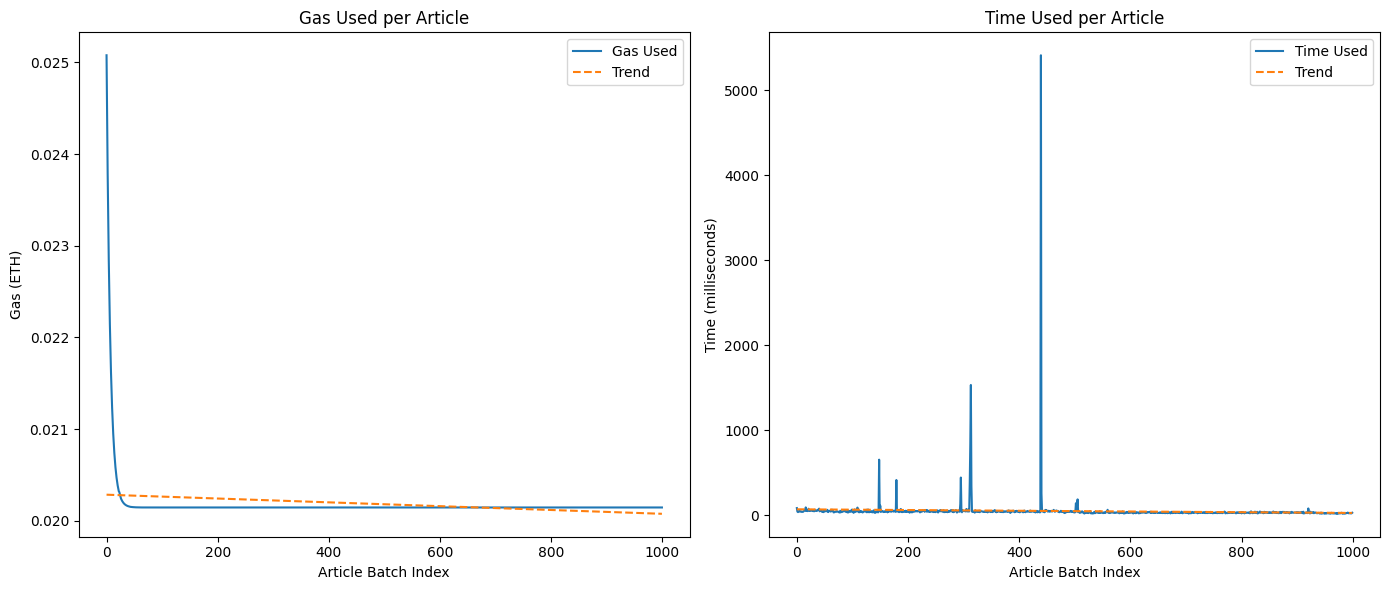

In [17]:
# Plotting gas and time trends
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(gas, label="Gas Used")
plt.plot(gas_trend.intercept + gas_trend.slope * x, label="Trend", linestyle="--")
plt.title("Gas Used per Article")
plt.xlabel("Article Batch Index")
plt.ylabel("Gas (ETH)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time, label="Time Used")
plt.plot(time_trend.intercept + time_trend.slope * x, label="Trend", linestyle="--")
plt.title("Time Used per Article")
plt.xlabel("Article Batch Index")
plt.ylabel("Time (milliseconds)")
plt.legend()

plt.tight_layout()
plt.savefig("./metrics/wiki_article_metrics.png")

In [18]:
(gas_stats, time_stats, gas_trend, time_trend, "./metrics/wiki_article_metrics_10000.png")

({'mean': 0.020180062945918627,
  'median': 0.020144850088637343,
  'std_dev': 0.0003034456657801543,
  'min': 0.020144821450427043,
  'max': 0.02507753596960775},
 {'mean': 46.55457489099989,
  'median': 34.78808199999912,
  'std_dev': 180.95862606554118,
  'min': 15.128952999999456,
  'max': 5408.643681999994},
 LinregressResult(slope=-2.0846957416867923e-07, intercept=0.02028419349821588, rvalue=-0.19832200317426232, pvalue=2.5063551031887087e-10, stderr=3.2613188232075086e-08, intercept_stderr=1.8815110491311615e-05),
 LinregressResult(slope=-0.04285226634249245, intercept=67.95928192907486, rvalue=-0.06836025359983637, pvalue=0.030651623314973547, stderr=0.019796468592397913, intercept_stderr=11.420923991031938),
 './metrics/wiki_article_metrics_10000.png')